In [1]:
from detectron2.data.datasets import register_coco_instances
import detectron2
import cv2
from matplotlib import pyplot as plt
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
import random
from detectron2.utils.visualizer import Visualizer


** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
register_coco_instances("fruits_nuts", {}, "./mydata/coco.json", "./mydata/images")

In [3]:
fruits_nuts_metadata = detectron2.data.MetadataCatalog.get("fruits_nuts")

In [4]:
dataset_dicts = detectron2.data.DatasetCatalog.get("fruits_nuts")

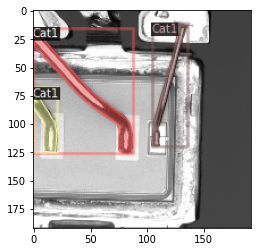

In [5]:

for d in random.sample(dataset_dicts,1):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    a = vis.get_image()[:, :, ::-1]
    plt.imshow(a)

In [6]:

cfg = get_cfg()
cfg.merge_from_file(
    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
)

In [7]:
cfg.DATASETS.TRAIN = ("fruits_nuts",)
cfg.DATASETS.TEST = ()  # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 4
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.02  # learning rate, default 0.02
cfg.SOLVER.MAX_ITER = (
    1300
)  # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = (
    128
)  # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)


In [8]:
cfg.SOLVER

CfgNode({'LR_SCHEDULER_NAME': 'WarmupMultiStepLR', 'MAX_ITER': 1300, 'BASE_LR': 0.02, 'MOMENTUM': 0.9, 'NESTEROV': False, 'WEIGHT_DECAY': 0.0001, 'WEIGHT_DECAY_NORM': 0.0, 'GAMMA': 0.1, 'STEPS': (210000, 250000), 'WARMUP_FACTOR': 0.001, 'WARMUP_ITERS': 1000, 'WARMUP_METHOD': 'linear', 'CHECKPOINT_PERIOD': 5000, 'IMS_PER_BATCH': 4, 'REFERENCE_WORLD_SIZE': 0, 'BIAS_LR_FACTOR': 1.0, 'WEIGHT_DECAY_BIAS': 0.0001, 'CLIP_GRADIENTS': CfgNode({'ENABLED': False, 'CLIP_TYPE': 'value', 'CLIP_VALUE': 1.0, 'NORM_TYPE': 2.0}), 'AMP': CfgNode({'ENABLED': False})})

In [9]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)


[01/13 10:58:25 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[01/13 10:58:25 d2.data.datasets.coco]: Loaded 336 images in COCO format from ./mydata/coco.json
[01/13 10:58:25 d2.data.build]: Removed 0 images with no usable annotations. 336 images left.
[01/13 10:58:25 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    Cat1    | 846          |
|            |              |
[01/13 10:58:25 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[01/13 10:58:25 d2.data.build]: Using training sampler TrainingSampler
[01/13 10:58:25 d2.data.common]: Serializing 336 elements to byte tensors and concatenating them all ...
[01/13 10:58:25 d2.data.common]: Serialized dataset takes 0.15 MiB
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: Remapping C2 weights ......
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.0.

[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.2.conv2.norm.running_var     loaded from res2_2_branch2b_bn_running_var    of shape (64,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.2.conv2.norm.weight          loaded from res2_2_branch2b_bn_gamma          of shape (64,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.2.conv2.weight               loaded from res2_2_branch2b_w                 of shape (64, 64, 3, 3)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.2.conv3.norm.bias            loaded from res2_2_branch2c_bn_beta           of shape (256,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.2.conv3.norm.running_mean    loaded from res2_2_branch2c_bn_running_mean   of shape (256,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res2.2.conv3.norm.running_var     loaded from res2_2_branch2c_bn_running_var    of shape (256,)
[01/13 10:

[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res3.2.conv1.weight               loaded from res3_2_branch2a_w                 of shape (128, 512, 1, 1)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res3.2.conv2.norm.bias            loaded from res3_2_branch2b_bn_beta           of shape (128,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res3.2.conv2.norm.running_mean    loaded from res3_2_branch2b_bn_running_mean   of shape (128,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res3.2.conv2.norm.running_var     loaded from res3_2_branch2b_bn_running_var    of shape (128,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res3.2.conv2.norm.weight          loaded from res3_2_branch2b_bn_gamma          of shape (128,)
[01/13 10:58:27 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res3.2.conv2.weight               loaded from res3_2_branch2b_w                 of shape (128, 128, 3,

[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.1.conv1.norm.running_mean    loaded from res4_1_branch2a_bn_running_mean   of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.1.conv1.norm.running_var     loaded from res4_1_branch2a_bn_running_var    of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.1.conv1.norm.weight          loaded from res4_1_branch2a_bn_gamma          of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.1.conv1.weight               loaded from res4_1_branch2a_w                 of shape (256, 1024, 1, 1)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.1.conv2.norm.bias            loaded from res4_1_branch2b_bn_beta           of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.1.conv2.norm.running_mean    loaded from res4_1_branch2b_bn_running_mean   of shape (256,)
[01/1

[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.4.conv1.norm.weight          loaded from res4_4_branch2a_bn_gamma          of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.4.conv1.weight               loaded from res4_4_branch2a_w                 of shape (256, 1024, 1, 1)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.4.conv2.norm.bias            loaded from res4_4_branch2b_bn_beta           of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.4.conv2.norm.running_mean    loaded from res4_4_branch2b_bn_running_mean   of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.4.conv2.norm.running_var     loaded from res4_4_branch2b_bn_running_var    of shape (256,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res4.4.conv2.norm.weight          loaded from res4_4_branch2b_bn_gamma          of shape (256,)
[01/1

[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res5.1.conv1.norm.bias            loaded from res5_1_branch2a_bn_beta           of shape (512,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res5.1.conv1.norm.running_mean    loaded from res5_1_branch2a_bn_running_mean   of shape (512,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res5.1.conv1.norm.running_var     loaded from res5_1_branch2a_bn_running_var    of shape (512,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res5.1.conv1.norm.weight          loaded from res5_1_branch2a_bn_gamma          of shape (512,)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res5.1.conv1.weight               loaded from res5_1_branch2a_w                 of shape (512, 2048, 1, 1)
[01/13 10:58:28 d2.checkpoint.c2_model_loading]: backbone.bottom_up.res5.1.conv2.norm.bias            loaded from res5_1_branch2b_bn_beta           of shape (512,)
[01/1

In [ ]:
trainer.train()

[01/13 10:58:29 d2.engine.train_loop]: Starting training from iteration 0


C:\pyother\detectron2\detectron2\modeling\roi_heads\fast_rcnn.py:217: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  num_fg = fg_inds.nonzero().numel()


[01/13 10:58:42 d2.utils.events]:  eta: 0:10:02  iter: 19  total_loss: 1.883  loss_cls: 0.3851  loss_box_reg: 0.02936  loss_mask: 0.6781  loss_rpn_cls: 0.6635  loss_rpn_loc: 0.06246  time: 0.4651  data_time: 0.1337  lr: 0.00039962  max_mem: 3199M
[01/13 10:58:52 d2.utils.events]:  eta: 0:10:05  iter: 39  total_loss: 1.738  loss_cls: 0.4095  loss_box_reg: 0.4211  loss_mask: 0.5544  loss_rpn_cls: 0.2701  loss_rpn_loc: 0.04547  time: 0.4801  data_time: 0.0020  lr: 0.00079922  max_mem: 3199M
[01/13 10:59:02 d2.utils.events]:  eta: 0:10:02  iter: 59  total_loss: 1.718  loss_cls: 0.3822  loss_box_reg: 0.6299  loss_mask: 0.4703  loss_rpn_cls: 0.1156  loss_rpn_loc: 0.0517  time: 0.4866  data_time: 0.0023  lr: 0.0011988  max_mem: 3199M
[01/13 10:59:13 d2.utils.events]:  eta: 0:10:06  iter: 79  total_loss: 1.554  loss_cls: 0.294  loss_box_reg: 0.6475  loss_mask: 0.4291  loss_rpn_cls: 0.08343  loss_rpn_loc: 0.0432  time: 0.4963  data_time: 0.0021  lr: 0.0015984  max_mem: 3199M
[01/13 10:59:23 d2.

In [17]:
#cfg = get_cfg()
#cfg.merge_from_file(
#    "./configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
#)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.95   # set the testing threshold for this model
cfg.DATASETS.TEST = ("fruits_nuts", )
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

predictor = detectron2.engine.defaults.DefaultPredictor(cfg)

0.015652179718017578,0.10884594917297363


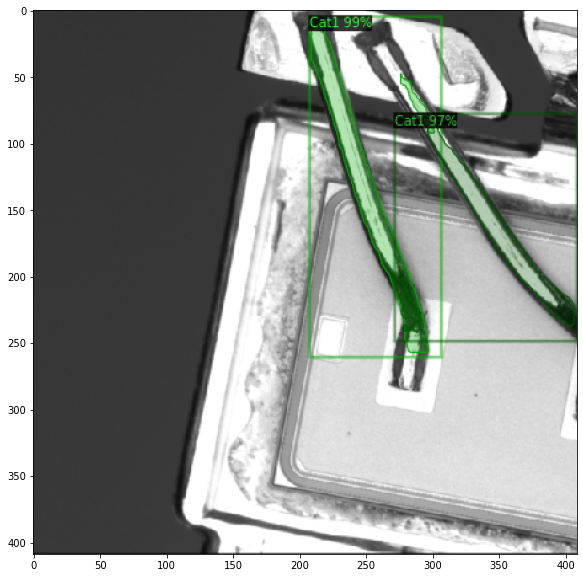

In [18]:
from detectron2.utils.visualizer import ColorMode
import time
plt.figure(figsize=(10,10))
for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    t0 = time.time()
    outputs = predictor(im)
    t1 = time.time()
    v = Visualizer(im[:, :, ::-1],
                   metadata=fruits_nuts_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    t2 = time.time()
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    a = v.get_image()[:, :, ::-1]
    plt.imshow(a)
    print(f'{t2-t1},{t1-t0}')